Here we will analyze the Dow Jones Industrial Average historical data from 2018 till now and let you know if it is a good investment stock trend.

Aqui, analisaremos os dados históricos do Dow Jones Industrial Average de 2018 até agora e informaremos se é uma boa tendência de estoque de investimento

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [23]:
# Coletando Dados
ticker = "^DJI"
start_date = "2018-01-01"
end_date = "2023-07-31"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [24]:
# Calculando Retornos Diários
daily_returns = data["Adj Close"].pct_change()
daily_returns

Date
2018-01-02         NaN
2018-01-03    0.003975
2018-01-04    0.006117
2018-01-05    0.008803
2018-01-08   -0.000509
                ...   
2023-07-24    0.005210
2023-07-25    0.000758
2023-07-26    0.002315
2023-07-27   -0.006684
2023-07-28    0.005004
Name: Adj Close, Length: 1402, dtype: float64

In [25]:
# Médias Móveis
data["MA50"] = data["Adj Close"].rolling(window=50).mean()
data["MA200"] = data["Adj Close"].rolling(window=200).mean()

In [26]:
#Regressão Linear
X = np.arange(len(data)).reshape(-1, 1)
y = data["Adj Close"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
data["Trend"] = reg.predict(X)

In [27]:
# Análise de Volatilidade
volatility = daily_returns.std()
volatility

0.013241263176696891

In [28]:
# Médias Móveis Exponenciais (EMA)
data["EMA12"] = data["Adj Close"].ewm(span=12, adjust=False).mean()
data["EMA26"] = data["Adj Close"].ewm(span=26, adjust=False).mean()

In [29]:
# Decomposição Sazonal
result = seasonal_decompose(data["Adj Close"], model="additive", period=252)  # Periodo anual
seasonal = result.seasonal
trend = result.trend
residual = result.resid

In [30]:
# Visualizações
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

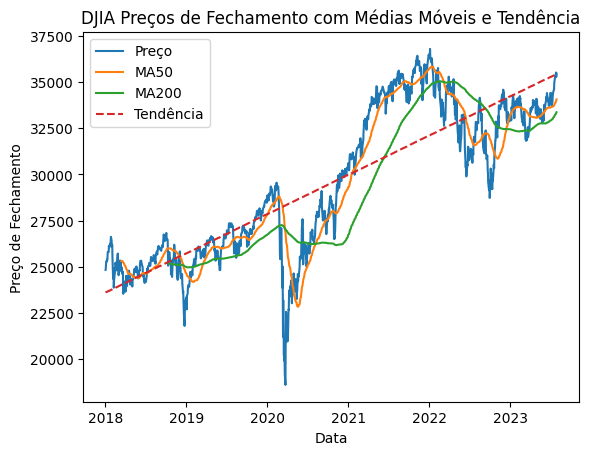

In [31]:
# Gráfico de Preços com Médias Móveis e Tendência
plt.plot(data.index, data["Adj Close"], label="Preço")
plt.plot(data.index, data["MA50"], label="MA50")
plt.plot(data.index, data["MA200"], label="MA200")
plt.plot(data.index, data["Trend"], label="Tendência", linestyle="--")

plt.title("DJIA Preços de Fechamento com Médias Móveis e Tendência")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.show()

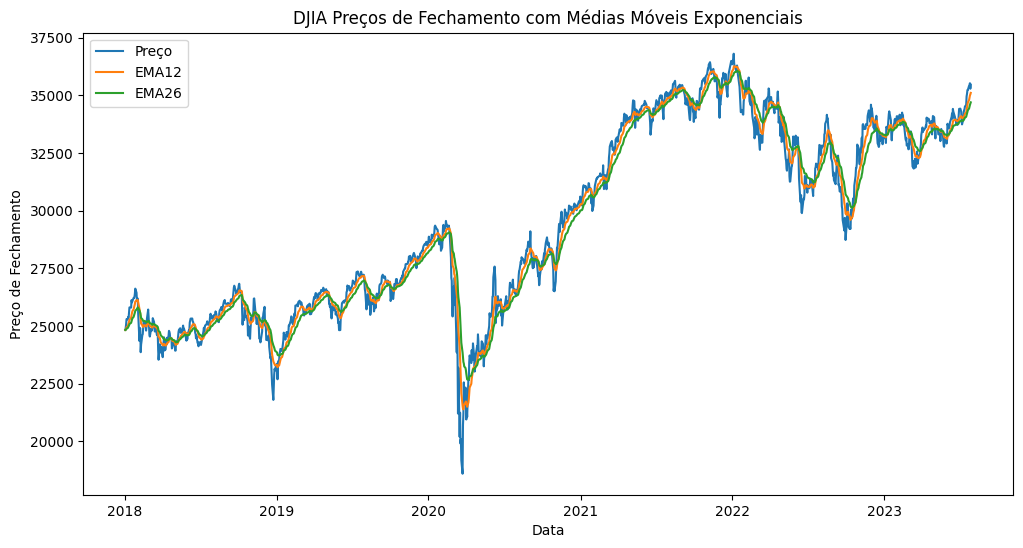

In [32]:
# Gráfico de Médias Móveis Exponenciais
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Adj Close"], label="Preço")
plt.plot(data.index, data["EMA12"], label="EMA12")
plt.plot(data.index, data["EMA26"], label="EMA26")

plt.title("DJIA Preços de Fechamento com Médias Móveis Exponenciais")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.show()

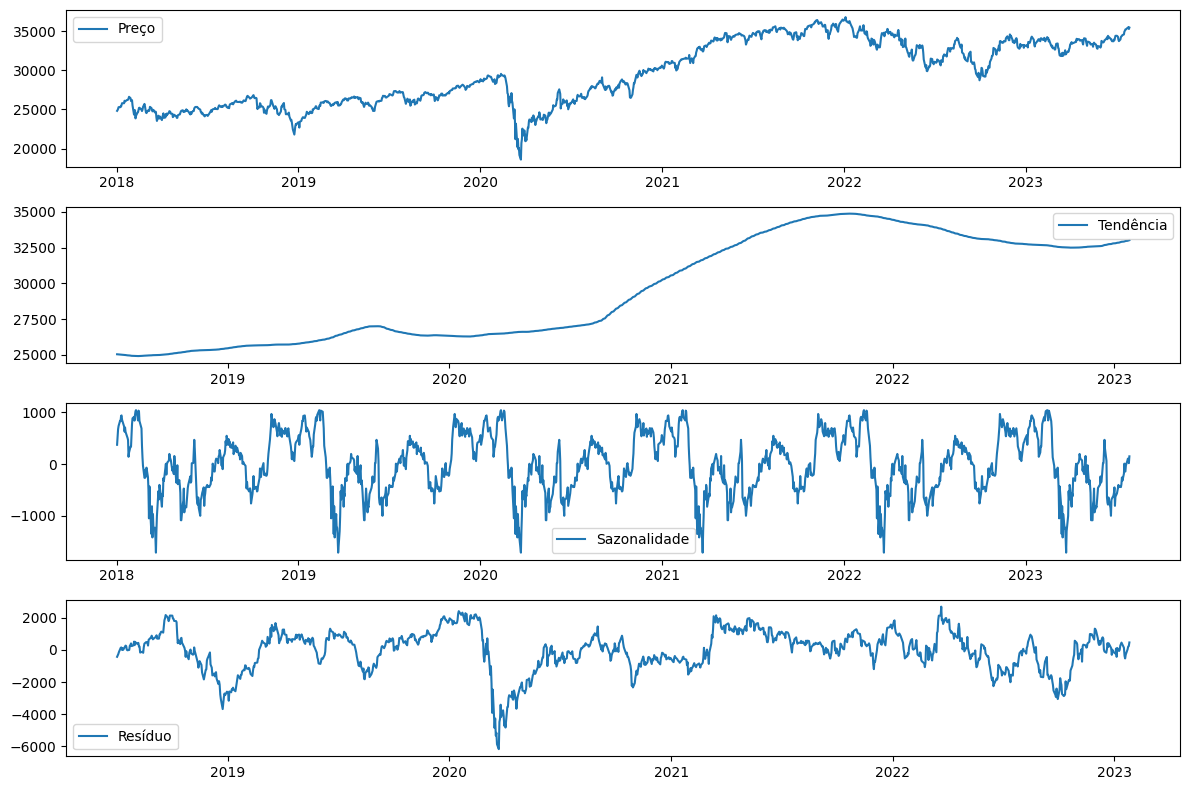

In [33]:
# Gráfico de Decomposição Sazonal
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data.index, data["Adj Close"], label="Preço")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data.index, trend, label="Tendência")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data.index, seasonal, label="Sazonalidade")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data.index, residual, label="Resíduo")
plt.legend()

plt.tight_layout()
plt.show()

 The Dow is also the financial media's most referenced U.S. market index and remains a good indicator of general market trends.

 O Dow também é o índice do mercado americano mais referenciado pela mídia financeira e continua sendo um bom indicador das tendências gerais do mercado.